# Matthew Moskal Final Project Milestone 4

#### Answering my 4 questions:
#### What countries are out there fishing? Are there countries that have a large share in global fishing efforts?
#### What types of fishing are going on? My dataset contains fishing vessel types, and I want to know what categories they fall into.
#### What is the percentage split of the amount of active hours vs the amount of fishing hours over this dataset?
#### What are the gross tonnage totals for each country's fishing fleet?

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib.colors as mcolors
import numpy as np

### Addressing Question 1
#### When I first ran this plot, I was unsatisfied. Every single country crammed right next to one another, with no story of which countries were truly impacting fishing as values couldn't even be picked out due to the scaling of the graph. So, I decided to put in "filters" for what I found to justify significant fishing efforts. Firstly, I researched and found that "VMS is required on all vessels exceeding 20 meters between perpendiculars, 24 meters length overall (LOA) or vessels over 15 meters LOA that are authorized to fish in waters beyond jurisdiction of the flag" (Global Fishing Watch). LOA stands for length overall, and so I decided that I was going to filter out tiny civilian fishing vessels that wouldn't cause much harm to general ocean populations by filtering out vessels below this 24 meter length threshold. Now that I had factored out tiny nations with only small speedboats registered to them, I could now address the graph's scaling. In order to paint a better picture of the nations who are actually playing a part in this fishing effort, I dynamically scaled my graph to only include the top ~10 percent of fishing efforts worldwide. Doing this gave me a narrowed list of nations on a properly scaled graph that I could now get a story from.

#### Conclusion: The graph shows that global fishing effort is highly concentrated. China dominates with over 190,000 large vessels, followed by a significant number of unflagged vessels (~31,000). Other countries, including South Korea, the USA, Taiwan, Russia, and Spain, have much smaller fleets, highlighting the steep drop-off after China and emphasizing the uneven global distribution of fishing capacity.

In [4]:
df = pd.read_csv("Fishing Vessels - Cleaned.csv", low_memory = False)

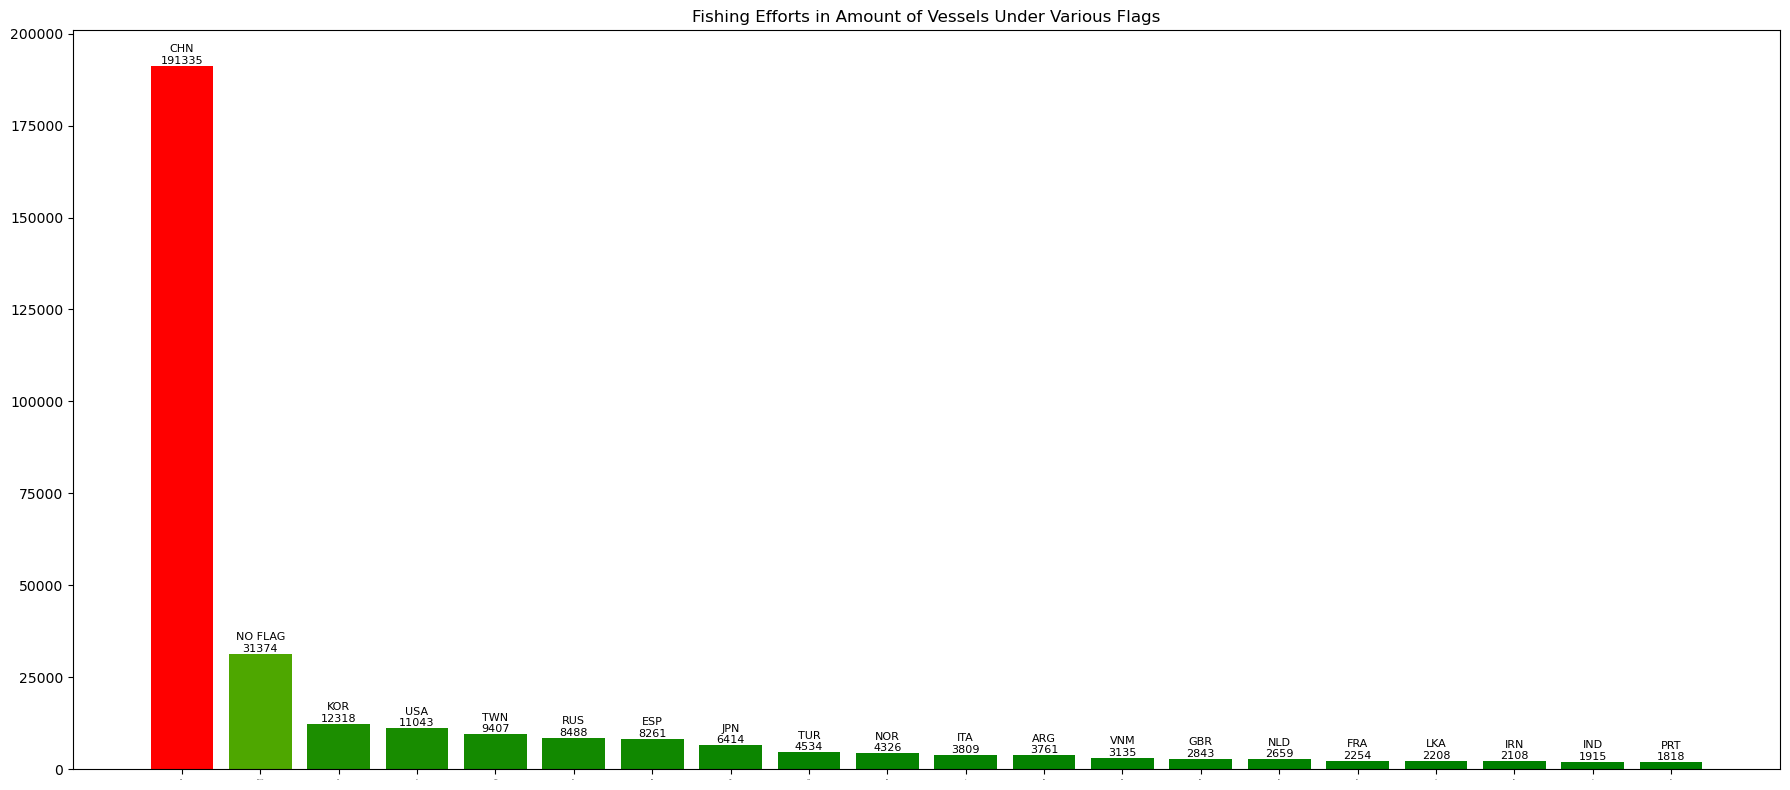

In [93]:
filtered = df[df['length_m_gfw'] >= 24]
flag_counts = filtered['flag_ais'].value_counts()

# used the following stack overflow conversation to figure out how to dynamically scale my graph to only include the top 10 percent of fishing efforts worldwide (significance filter)
# https://stackoverflow.com/questions/48447641/cumulative-sum-up-to-threshold
cumulative = flag_counts.cumsum() / flag_counts.sum()
min_count = flag_counts[cumulative <= 0.9].min() 

flag_counts = flag_counts[flag_counts >= min_count]

# the following lines for a colormap were generated by ChatGPT to enhance my plot
colors_list = ["green", "yellow", "red"]
cmap = mcolors.LinearSegmentedColormap.from_list("green_yellow_red", colors_list)

norm = mcolors.Normalize(vmin=flag_counts.min(), vmax=flag_counts.max())
colors = [cmap(norm(value)) for value in flag_counts.values]

plt.figure(figsize=(18,8))
bars = plt.bar(flag_counts.index, flag_counts.values, color=colors)

plt.xticks(rotation=0, fontsize=0)
plt.ylabel('')
plt.title("Fishing Efforts in Amount of Vessels Under Various Flags")

# this code was generated by ChatGPT in order to add country names and counts above their bars to enhance the visual
for bar, count, country in zip(bars, flag_counts.values, flag_counts.index):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{country}\n{count}', ha='center', va='bottom', fontsize=8, rotation=0)

plt.tight_layout()
plt.show()

### Addressing Question 2
#### I had to do a lot less work on scaling and making the graph look better for this question. The number of vessel categories is numbered compared to the number of countries, so no scaling was needed for this answer. I was simply able to plot my counts on the graph, and a clear conclusion emerged for what types of fishing are occurring in our oceans as we speak.

#### Conclusion: The graph shows that global fishing activity is dominated by a few vessel types, with trawlers and fishing vessels being the most common. Other categories, like set gillnets, longlines, and fixed gear, occur less frequently, while specialized vessels such as seiners and trollers make up only a small portion. Overall, fishing efforts are highly concentrated among a few dominant vessel types, especially trawlers. Through my further research, I have found out why. Trawling is incredibly efficient. Vast swaths of fish are able to be caught at once, and the investment is minimal. However, trawling is one of, if not the worst, fishing methods out there. Trawling involves dragging massive nets across the seafloor, which scoops up fish but also anything else in the net's path. Entire ecosystems are erased as these ships pass over, and they cause unfathomable amounts of damage to the seafloor environment. 

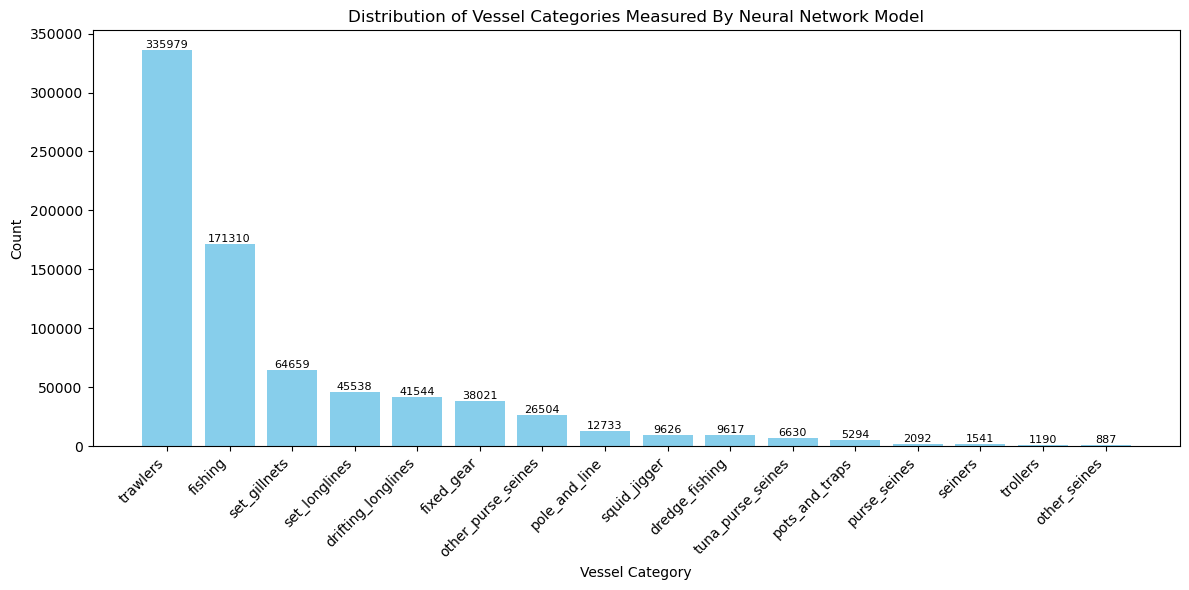

In [94]:
gfw_counts = df['vessel_class_gfw'].value_counts()

categories = gfw_counts.index
counts = gfw_counts.values
x = np.arange(len(categories))

plt.figure(figsize=(12,6))
bars = plt.bar(x, counts, color='skyblue')
plt.xticks(x, categories, rotation=45, ha='right')
plt.xlabel('Vessel Category')
plt.ylabel('Count')
plt.title('Distribution of Vessel Categories Measured By Neural Network Model')

# this code was generated by ChatGPT in order to add counts above bars to enhance the visual
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{count}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### Addressing Question 3

#### This graph was the most straightforward of them all thus far. To get a nice view of what the split between active and actual fishing hours is, I opted for a simple bar chart. As a result, the code here is quite self-explanatory and didn't really require any tampering or filtering from me in order to get the graph looking nice.

#### Conclusion: This graph really surprised me when I ran this code for the first time. I had always thought that mass fishing is a super effective practice, and whilst very dangerous for the environment, it was extremely efficient at minimizing downtimes and maximizing fishing hours. Because of this, I thought that the amount of fishing hours would be the dominant split in this pie chart. I ended up being dead wrong, as you can see, with an almost 75 to 25 percent split of active to fishing hours. These numbers are astonishing. Only a quarter of the time that these ships actually spend out at sea is doing what they are expected to do. When researching further, I believe that I have found why I was so wrong. As mass fishing efforts continue to destabilize ocean ecosystems, fishermen are forced to fish further from their native waters. This increases travel time to and from ports, drastically decreasing fishing efficiency as time goes on.

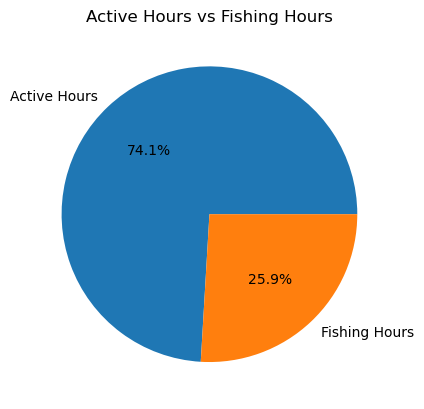

In [14]:
a = df['active_hours'].sum()
b = df['fishing_hours'].sum()

plt.figure()
plt.pie([a, b], labels=['Active Hours', 'Fishing Hours'], autopct='%1.1f%%')
plt.title('Active Hours vs Fishing Hours')
plt.show()

### Addressing Question 4
#### This graph took a lot from my graph which answers my question about which countries are participating in major fishing efforts. A lot of the features of the graph are similar, including my filter by the 24-meter LOA identifier for a significant fishing vessel, and my filter to only include the top ten percent of the heaviest nation fleets in order to make the graph not squished with the hundreds of country flag entries on it.

#### Conclusion: This graph, though similar to my first, paints a very different story than it, and that is that country fleet sizes do not directly correlate to the total gross tonnage of their respective fleets. If we look at our first graph, we can see that Russia has only 8488 vessels under its flag. On the other hand, China, with almost 200,000 vessels, has 22 times the number of ships in its fleet as the Russians. Now, we look to this graph below. We can see that the gross total tonnage of Russia's fleet is only around a fifth of the Chinese fleet. How is this possible? Well, when researching further, I found the reason. Russian fishing vessels primarily target species like cod, herring, salmon, and pollock. On the other hand, Chinese vessels almost always target squid. Species targeted by the Russians are mainly caught using trawlers, and squid are mainly caught using squid jiggers. Linking this discovery to my second graph, I can see that trawlers are by far the most dominant vessel type, and thus fleets using vast amounts of them would amass great tonnage numbers due to the sheer presence that trawlers have on the split of vessel categories worldwide. This would explain how this tonnage to fleet size differential occurs, and China is simply still dominating on this graph due to the sheer amount of ships underneath their flag.

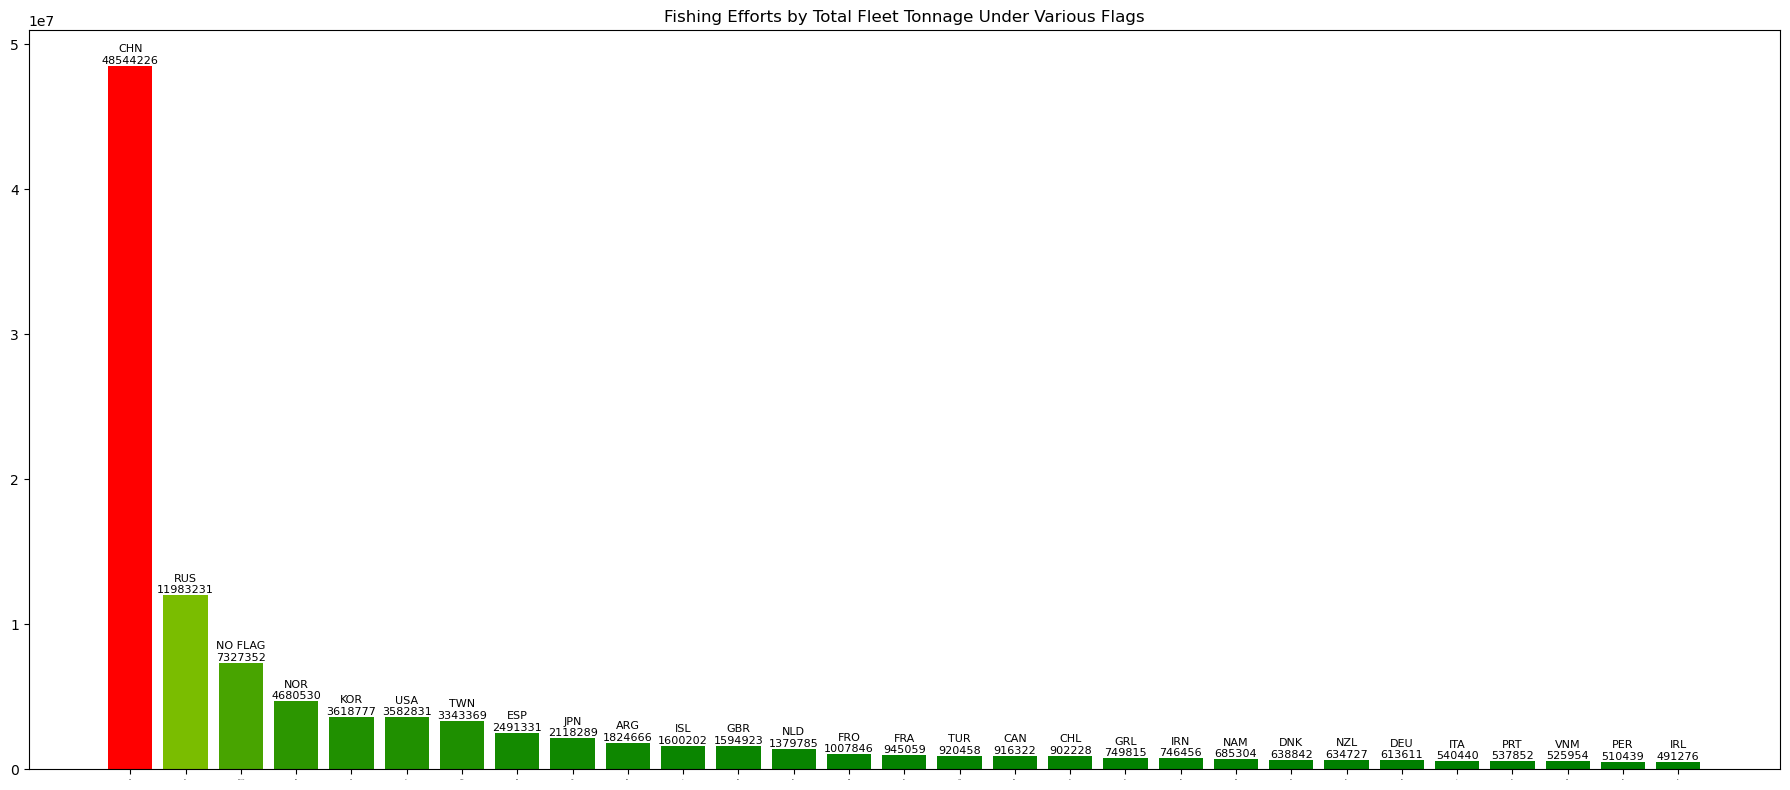

In [18]:
filtered = df[df['length_m_gfw'] >= 24]

#filtering the array of entries to group via flag and tonnage, then summing and sorting values
flag_tonnage = (
    filtered
    .groupby('flag_ais')['tonnage_gt_gfw'].sum().sort_values(ascending=False)
)

# used the following stack overflow conversation to figure out how to dynamically scale my graph to only include the top 10 percent of fishing efforts worldwide (significance filter)
# https://stackoverflow.com/questions/48447641/cumulative-sum-up-to-threshold
cumulative = flag_tonnage.cumsum() / flag_tonnage.sum()
min_tonnage = flag_tonnage[cumulative <= 0.9].min()
flag_tonnage = flag_tonnage[flag_tonnage >= min_tonnage]

# the following lines for a colormap were generated by ChatGPT to enhance my plot
colors_list = ["green", "yellow", "red"]
cmap = mcolors.LinearSegmentedColormap.from_list("green_yellow_red", colors_list)

norm = mcolors.Normalize(vmin=flag_tonnage.min(), vmax=flag_tonnage.max())
colors = [cmap(norm(value)) for value in flag_tonnage.values]

plt.figure(figsize=(18,8))
bars = plt.bar(flag_tonnage.index, flag_tonnage.values, color=colors)

plt.xticks(rotation=0, fontsize=0)
plt.ylabel('')
plt.title("Fishing Efforts by Total Fleet Tonnage Under Various Flags")

# this code was generated by ChatGPT in order to add counts above bars to enhance the visual
for bar, tonnage, country in zip(bars, flag_tonnage.values, flag_tonnage.index):
    plt.text(
        bar.get_x() + bar.get_width()/2,bar.get_height(),f'{country}\n{int(tonnage)}',ha='center',va='bottom',fontsize=8)

plt.tight_layout()
plt.show()